<h1><center>Scraping of data of 15 Indian projects from 4Coffshore.com using Python Scrapping libraries<h1> 

In [13]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as soup
from requests import get
from requests.exceptions import RequestException
import csv
from datetime import datetime
from urllib.request import urlopen as uReq
import re

In [147]:
page_url1 = "https://www.4coffshore.com/windfarms/tamil-nadu---greenshore-energy-india-in11.html"
uClient1 = uReq(page_url1)
page_soup1 = soup(uClient1.read(), "html.parser")


<h4>All The Links Having India In Their URL<h4>

In [148]:
links = []
 
for link in page_soup1.findAll('a', attrs={'href': re.compile("india")}):
    links.append(link.get('href'))
    
links[0]="/windfarms/"+links[0] 
print(links)

['/windfarms/tamil-nadu---greenshore-energy-india-in11.html', '/windfarms/gujarat---flowocean-ab-india-in21.html', '/windfarms/gujarat---greenshore-energy-india-in08.html', '/windfarms/gujarat---jakhau---samiran-udaipur-wind%0d%0afarms-limited-india-in22.html', '/windfarms/mnre-offshore-wind-turbine-demonstration-project---arichal-munai---dhanushkodi-india-in23.html', '/windfarms/ongc---commercial-project-india-in07.html', '/windfarms/ongc---pilot-project-india-in06.html', '/windfarms/ongc---vertical-axis-pilot-project-india-in12.html', '/windfarms/tamil-nadu---bharat-light-%26-power-india-in09.html', '/windfarms/tamil-nadu---flowocean-ab-india-in20.html', '/windfarms/tamil-nadu---greenshore-energy-india-in11.html', '/windfarms/tamil-nadu---suzlon-india-in10.html', '/windfarms/tamil-nadu-energy-development-agency-(teda)-india-in18.html', '/windfarms/first-1000-mw-commercial-offshore-wind-farm-in-india-india-in15.html', '/windfarms/fowind---facilitating-offshore-wind-in-india---gujarat-

In [16]:
links=['https://www.4coffshore.com{0}'.format(i) for i in links]
links.pop(3)

'https://www.4coffshore.com/windfarms/gujarat---jakhau---samiran-udaipur-wind%0d%0afarms-limited-india-in22.html'

In [20]:
len(links)
links

['https://www.4coffshore.com/windfarms/tamil-nadu---greenshore-energy-india-in11.html',
 'https://www.4coffshore.com/windfarms/gujarat---flowocean-ab-india-in21.html',
 'https://www.4coffshore.com/windfarms/gujarat---greenshore-energy-india-in08.html',
 'https://www.4coffshore.com/windfarms/mnre-offshore-wind-turbine-demonstration-project---arichal-munai---dhanushkodi-india-in23.html',
 'https://www.4coffshore.com/windfarms/ongc---commercial-project-india-in07.html',
 'https://www.4coffshore.com/windfarms/ongc---pilot-project-india-in06.html',
 'https://www.4coffshore.com/windfarms/ongc---vertical-axis-pilot-project-india-in12.html',
 'https://www.4coffshore.com/windfarms/tamil-nadu---bharat-light-%26-power-india-in09.html',
 'https://www.4coffshore.com/windfarms/tamil-nadu---flowocean-ab-india-in20.html',
 'https://www.4coffshore.com/windfarms/tamil-nadu---greenshore-energy-india-in11.html',
 'https://www.4coffshore.com/windfarms/tamil-nadu---suzlon-india-in10.html',
 'https://www.4co

<h1>Now Making a python script that scraps the required data from every link automatically<h1>

In [21]:
res1=[]
for i in range(0,16):
    page_url = links[i]
    uClient = uReq(page_url)
    page_soup = soup(uClient.read(), "html.parser")
    uClient.close()
    container = page_soup.find("table",{"id": "ctl00_Body_Main_Content_FormView1"}).text.strip()
    full_table=container.split("\n\n")
    res1.append(full_table)

<h2>Converting the data into a readable csv file<h2>

In [150]:
my_df = pd.DataFrame(res1)
my_df.drop(my_df.columns[[0,4,8,12,16,20,265,261,257,253,249,245,24,28,32,221,225,229,233,237,241,201,205,209,213,217,36,181,185,189,193,197,161,165,169,173,177,141,145,149,153,157,121,125,129,133,137,109,113,117,100,104,96,92,198,88,40,44,48,52,56,60,64,68,72,76,80,84]], axis=1, inplace=True)
my_df.replace([''], np.nan, inplace = True)
my_df=my_df.dropna( how='all', axis='columns' )
my_df=my_df.rename(columns={'1': 'Name','5':'Other_names','9':'Country_name','13':'Region','25':'Development_status','17':'comments','21':'Round/Category','29':'Project_Capacity','33':'Turbine_Model','37':'Turbine_Capacity','41':'Number_Of_Turbines','250':'Homes_powered_annually','254':'CO2_Reduced/year','258':'SO2_Reduced/year','266':'Website','85':'Depth_Range/Chart_Datum','89':'Depth_Range_Stated_By_Developer','93':'Distance_from_Shore_Reported','97':'Distance_from_Shore_computed_from_centre','110':'Converter/Collector_platforms','114':'Offshore_transformers','57':'Foundation','61':'10_year_mean_wind_speed_2000-2009','69':'Sea_Name','73':'Centre_Latitude','77':'Centre_Longitude'})
my_df.to_csv('out.csv', index=False, header=True)

print (my_df)


                                                  1    \
0                      Tamil Nadu - Greenshore Energy   
1                              Gujarat - FLOWOCEAN AB   
2                         Gujarat - Greenshore Energy   
3   MNRE Offshore Wind Turbine Demonstration Proje...   
4                           ONGC - Commercial Project   
5                                ONGC - Pilot Project   
6                  ONGC - Vertical Axis Pilot Project   
7                   Tamil Nadu - Bharat Light & Power   
8                           Tamil Nadu - FLOWOCEAN AB   
9                      Tamil Nadu - Greenshore Energy   
10                                Tamil Nadu - Suzlon   
11        Tamil Nadu Energy Development Agency (TEDA)   
12  First 1000 MW commercial offshore wind farm in...   
13  FOWIND - Facilitating Offshore Wind in INDia -...   
14  FOWIND - Facilitating Offshore Wind in INDia -...   
15                               Gujarat - TATA Power   

                              

In [152]:
sample=pd.read_csv('C:/Users/Sanket/out.csv')
sample


,1,5,9,13,17,21,25,29,33,37,...,85,89,93,97,110,114,250,254,258,266
0,Tamil Nadu - Greenshore Energy,NaN,India,Tamil Nadu,Project will be located off the coast of Rames...,NaN,Concept/Early Planning,500 MW,Not Decided,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,354128.0,715692 tonnes,16644 tonnes,NaN
1,Gujarat - FLOWOCEAN AB,NaN,India,Gujarat,NaN,NaN,Concept/Early Planning,NaN,Not Decided,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gujarat - Greenshore Energy,NaN,India,Gujarat,NaN,NaN,Concept/Early Planning,600 MW,Not Decided,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,424953.0,858830 tonnes,19973 tonnes,NaN
3,MNRE Offshore Wind Turbine Demonstration Proje...,NaN,India,Tamil Nadu,Onshore test site for offshore wind turbines.,NaN,Concept/Early Planning,24 MW - 24 MW,Not Decided,6 MW (Minimum),...,NaN,NaN,NaN,NaN,NaN,NaN,16998.0,34353 tonnes,799 tonnes,NaN
4,ONGC - Commercial Project,NaN,India,Maharashtra,NaN,NaN,Concept/Early Planning,500 MW,Not Decided,5 MW (Minimum),...,NaN,NaN,NaN,NaN,NaN,NaN,354128.0,715692 tonnes,16644 tonnes,NaN
5,ONGC - Pilot Project,NaN,India,Maharashtra,Decomissioned oil platforms may be used as fou...,NaN,Concept/Early Planning,10 MW,Not Decided,1.5 MW (Minimum),...,NaN,NaN,NaN,NaN,None,None,7083.0,14314 tonnes,333 tonnes,NaN
6,ONGC - Vertical Axis Pilot Project,NaN,India,Gujarat,NaN,Demonstrator,Concept/Early Planning,NaN,Not Decided,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Tamil Nadu - Bharat Light & Power,NaN,India,Tamil Nadu,Project will be located off the coast of Rames...,NaN,Concept/Early Planning,500 MW,Not Decided,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,354128.0,715692 tonnes,16644 tonnes,NaN
8,Tamil Nadu - FLOWOCEAN AB,NaN,India,Tamil Nadu,NaN,NaN,Concept/Early Planning,NaN,Not Decided,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tamil Nadu - Greenshore Energy,NaN,India,Tamil Nadu,Project will be located off the coast of Rames...,NaN,Concept/Early Planning,500 MW,Not Decided,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,354128.0,715692 tonnes,16644 tonnes,NaN


In [153]:
sample=sample.rename(columns={'1': 'Name','5':'Other_names','9':'Country_name','13':'Region','25':'Development_status','17':'comments','21':'Round/Category','29':'Project_Capacity','33':'Turbine_Model','37':'Turbine_Capacity','41':'Number_Of_Turbines','250':'Homes_powered_annually','254':'CO2_Reduced/year','258':'SO2_Reduced/year','266':'Website','85':'Depth_Range/Chart_Datum','89':'Depth_Range_Stated_By_Developer','93':'Distance_from_Shore_Reported','97':'Distance_from_Shore_computed_from_centre','110':'Converter/Collector_platforms','114':'Offshore_transformers','57':'Foundation','61':'10_year_mean_wind_speed_2000-2009','69':'Sea_Name','73':'Centre_Latitude','77':'Centre_Longitude'})

In [155]:
print(sample)
sample.to_csv('final.csv', index=False, header=True)

                                                 Name  \
0                      Tamil Nadu - Greenshore Energy   
1                              Gujarat - FLOWOCEAN AB   
2                         Gujarat - Greenshore Energy   
3   MNRE Offshore Wind Turbine Demonstration Proje...   
4                           ONGC - Commercial Project   
5                                ONGC - Pilot Project   
6                  ONGC - Vertical Axis Pilot Project   
7                   Tamil Nadu - Bharat Light & Power   
8                           Tamil Nadu - FLOWOCEAN AB   
9                      Tamil Nadu - Greenshore Energy   
10                                Tamil Nadu - Suzlon   
11        Tamil Nadu Energy Development Agency (TEDA)   
12  First 1000 MW commercial offshore wind farm in...   
13  FOWIND - Facilitating Offshore Wind in INDia -...   
14  FOWIND - Facilitating Offshore Wind in INDia -...   
15                               Gujarat - TATA Power   

                              

In [156]:
sample1=pd.read_csv('C:/Users/Sanket/final.csv')
sample1


,Name,Other_names,Country_name,Region,comments,Round/Category,Development_status,Project_Capacity,Turbine_Model,Turbine_Capacity,...,Depth_Range/Chart_Datum,Depth_Range_Stated_By_Developer,Distance_from_Shore_Reported,Distance_from_Shore_computed_from_centre,Converter/Collector_platforms,Offshore_transformers,Homes_powered_annually,CO2_Reduced/year,SO2_Reduced/year,Website
0,Tamil Nadu - Greenshore Energy,NaN,India,Tamil Nadu,Project will be located off the coast of Rames...,NaN,Concept/Early Planning,500 MW,Not Decided,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,354128.0,715692 tonnes,16644 tonnes,NaN
1,Gujarat - FLOWOCEAN AB,NaN,India,Gujarat,NaN,NaN,Concept/Early Planning,NaN,Not Decided,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gujarat - Greenshore Energy,NaN,India,Gujarat,NaN,NaN,Concept/Early Planning,600 MW,Not Decided,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,424953.0,858830 tonnes,19973 tonnes,NaN
3,MNRE Offshore Wind Turbine Demonstration Proje...,NaN,India,Tamil Nadu,Onshore test site for offshore wind turbines.,NaN,Concept/Early Planning,24 MW - 24 MW,Not Decided,6 MW (Minimum),...,NaN,NaN,NaN,NaN,NaN,NaN,16998.0,34353 tonnes,799 tonnes,NaN
4,ONGC - Commercial Project,NaN,India,Maharashtra,NaN,NaN,Concept/Early Planning,500 MW,Not Decided,5 MW (Minimum),...,NaN,NaN,NaN,NaN,NaN,NaN,354128.0,715692 tonnes,16644 tonnes,NaN
5,ONGC - Pilot Project,NaN,India,Maharashtra,Decomissioned oil platforms may be used as fou...,NaN,Concept/Early Planning,10 MW,Not Decided,1.5 MW (Minimum),...,NaN,NaN,NaN,NaN,None,None,7083.0,14314 tonnes,333 tonnes,NaN
6,ONGC - Vertical Axis Pilot Project,NaN,India,Gujarat,NaN,Demonstrator,Concept/Early Planning,NaN,Not Decided,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Tamil Nadu - Bharat Light & Power,NaN,India,Tamil Nadu,Project will be located off the coast of Rames...,NaN,Concept/Early Planning,500 MW,Not Decided,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,354128.0,715692 tonnes,16644 tonnes,NaN
8,Tamil Nadu - FLOWOCEAN AB,NaN,India,Tamil Nadu,NaN,NaN,Concept/Early Planning,NaN,Not Decided,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tamil Nadu - Greenshore Energy,NaN,India,Tamil Nadu,Project will be located off the coast of Rames...,NaN,Concept/Early Planning,500 MW,Not Decided,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,354128.0,715692 tonnes,16644 tonnes,NaN


<h2> Now we will have some visualiztiion after analysing this data<h2>

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud, STOPWORDS

In [158]:
sample1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 26 columns):
Name                                        16 non-null object
Other_names                                 1 non-null object
Country_name                                16 non-null object
Region                                      16 non-null object
comments                                    9 non-null object
Round/Category                              2 non-null object
Development_status                          16 non-null object
Project_Capacity                            10 non-null object
Turbine_Model                               16 non-null object
Turbine_Capacity                            4 non-null object
Number_Of_Turbines                          2 non-null object
Foundation                                  16 non-null object
10_year_mean_wind_speed_2000-2009           16 non-null object
Sea_Name                                    16 non-null object
Centre_Latitude     

In [159]:
sample1.nunique()

Name                                        15
Other_names                                  1
Country_name                                 1
Region                                       4
comments                                     5
Round/Category                               2
Development_status                           3
Project_Capacity                             6
Turbine_Model                                1
Turbine_Capacity                             4
Number_Of_Turbines                           2
Foundation                                   5
10_year_mean_wind_speed_2000-2009            1
Sea_Name                                     4
Centre_Latitude                             15
Centre_Longitude                            14
Depth_Range/Chart_Datum                      3
Depth_Range_Stated_By_Developer              2
Distance_from_Shore_Reported                 1
Distance_from_Shore_computed_from_centre     3
Converter/Collector_platforms                1
Offshore_tran

In [220]:
def view_bar(x,y,title):
    plt.figure(figsize = (8,6))
    sns.barplot(x = x, y = y)
    plt.title(title)
    plt.xticks(rotation = 40)
    plt.show()

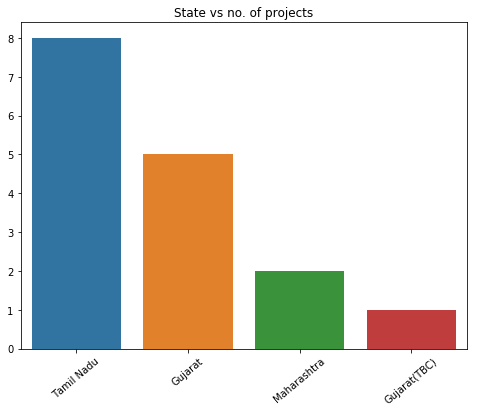

In [221]:
x = sample1.Region.value_counts().index
y = sample1.Region.value_counts().values
title = "State vs no. of projects"
view_bar(x,y,title)

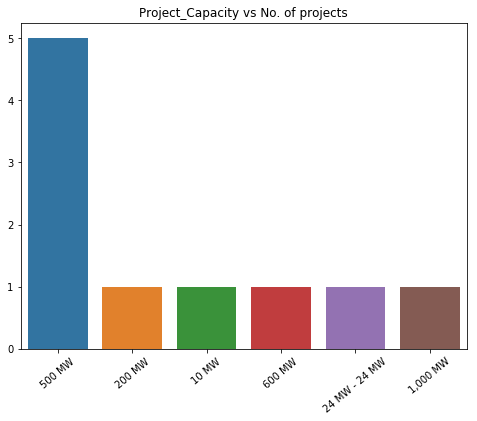

In [222]:
x = sample1.Project_Capacity.value_counts().index
y = sample1.Project_Capacity.value_counts().values
title = "Project_Capacity vs No. of projects"
view_bar(x,y,title)

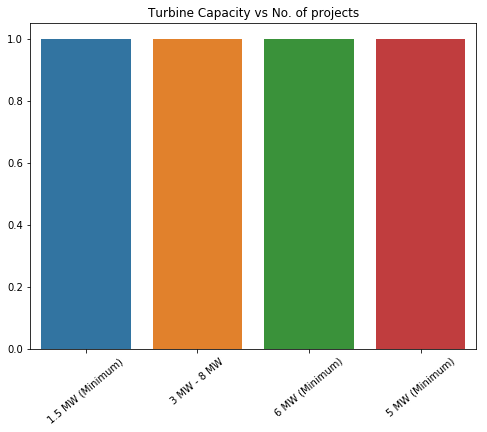

In [223]:
x = sample1.Turbine_Capacity.value_counts().index
y = sample1.Turbine_Capacity.value_counts().values
title = "Turbine Capacity vs No. of projects"
view_bar(x,y,title)

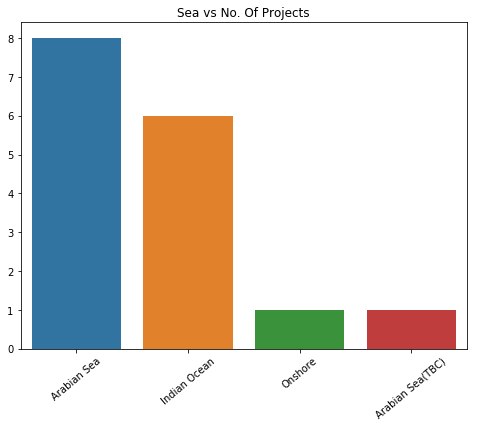

In [224]:
x = sample1.Sea_Name.value_counts().index
y = sample1.Sea_Name.value_counts().values
title = "Sea vs No. Of Projects"
view_bar(x,y,title)

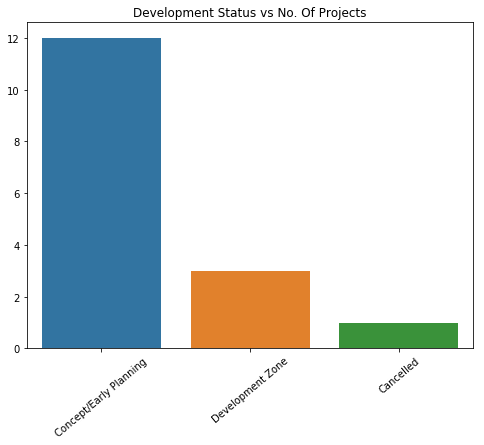

In [225]:
x = sample1.Development_status.value_counts().index
y = sample1.Development_status.value_counts().values
title = "Development Status vs No. Of Projects"
view_bar(x,y,title)

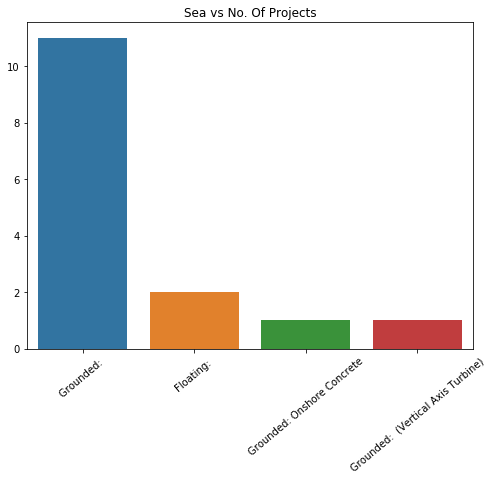

In [228]:
x = sample1.Foundation.value_counts().head(4).index
y = sample1.Foundation.value_counts().head(4).values
title = "Foundation vs No. Of Projects"
view_bar(x,y,title)

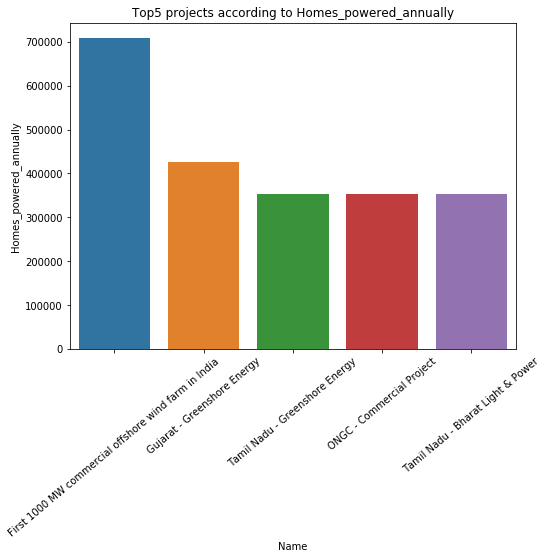

In [240]:
sort_by_views = sample1.sort_values(by ="Homes_powered_annually" , ascending = False).drop_duplicates('Name', keep = 'first')
x = sort_by_views['Name'].head(5)
y = sort_by_views['Homes_powered_annually'].head(5)
title = "Top5 projects according to Homes_powered_annually"
view_bar(x,y,title)

In [175]:
def createwordcloud(data , bgcolor , title, w, m):
    plt.figure(figsize = (20,10))
    wc = WordCloud(background_color = bgcolor, max_words = w, stopwords = STOPWORDS, max_font_size = m, width = 800)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.title(title,fontsize=15, fontweight='bold')

    plt.axis('off')

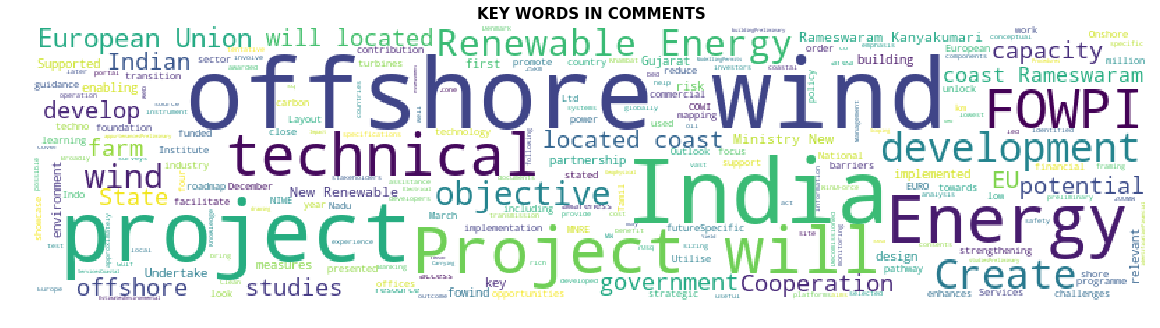

In [252]:
tags = sample1.dropna(subset=['comments'])
asa=tags['comments']
createwordcloud(asa , 'white' , 'KEY WORDS IN COMMENTS', 1000 , 70)

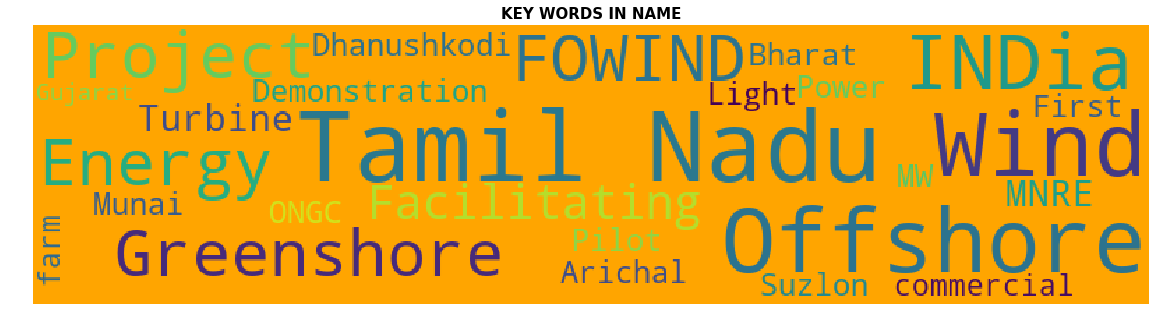

In [251]:
tags1 = sample1.dropna(subset=['Name'])
asa1=tags['Name']
createwordcloud(asa1 , 'orange' , 'KEY WORDS IN NAME', 1000 , 70)

In [243]:
dev = sample1.dropna(subset=['CO2_Reduced/year'])
dev['dfs'] = dev['CO2_Reduced/year'].str.split('t').str[0]
dev['dfs'].astype('int64')
dev['dfs']
#dev['Name']
#sort_by_views = dev.sort_values(by ="dfs" , ascending = False).drop_duplicates('Name', keep = 'first')
#x = sort_by_views['Name'].head(5)
#y = sort_by_views['dfs'].head(5)
#title = "Top5 projects according to Homes_powered_annually"
#view_bar(x,y,title)

C:\Users\Sanket\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0      715692 
2      858830 
3       34353 
4      715692 
5       14314 
7      715692 
9      715692 
10     715692 
11     286277 
12    1431384 
Name: dfs, dtype: object

<h2><center>THANK YOU-SANKET DUHOON<center><h2>
    
    